In [ ]:
%pip install numpy pandas seaborn matplotlib plotly scikit-learn nltk wordcloud pyspellchecker beautifulsoup4

### Loading of Data

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\tiled\OneDrive\Desktop\DataSet\IMDB-Dataset.csv',encoding='latin-1')

In [2]:
df.head(10)["Reviews"]

0    *Disclaimer: I only watched this movie as a co...
1    I am writing this in hopes that this gets put ...
2    Really, I could write a scathing review of thi...
3    If you saw the other previous spoof movies by ...
4    This movie I saw a day early for free and I st...
5    Honestly, what is wrong with you, Hollywood? N...
6    I was given a free ticket to this film; so I c...
7    OK, so "Disastrous" isn't an imaginative barb ...
8    Jason Friedberg and Aaron Seltzer, the way eve...
9    Honestly the worst movie ever made. Theatre fu...
Name: Reviews, dtype: object

### Customizing Stopwords for Enhanced Text Preprocessing

*Enhancing the default stopword list by adding domain-specific words and removing negations to improve text analysis accuracy.*

In [3]:
from nltk.corpus import stopwords
import nltk

stop_words = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

new_stopwords = [
"would", "shall", "could", "might", "movie", "movies", "film", "films",
"cinema", "director", "directors", "actor", "actors", "actress", "actresses",
"cast", "screenplay", "plot", "story", "character", "characters", "scene",
"scenes", "soundtrack", "soundtracks","sequel", "prequel", "adaptation", "trailer", "genre", "genres", "release",
"theaters", "theatre", "performance", "performances", "acting", "blockbuster",
"indie", "oscars", "oscar", "award-winning", "box", "office", "premiere",
"rating", "ratings", "reviews", "animation", "cinematography", "editing", "script", "narrative",
"direction", "score", "soundtrack"
]

stop_words.extend(new_stopwords)
stop_words.remove("not")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tiled\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
stop_words=set(stop_words)
print(len(stop_words))

233


### Data Cleaning and Text Preprocessing Pipeline

*Comprehensive functions for cleaning and preparing text data, including removing special characters, URLs, stopwords, and expanding contractions to enhance the quality of the dataset.*

### Correction of Typos

*Written text often contains errors, such as “Fen” instead of “Fan.” To rectify these errors, a dictionary is employed to map words to their correct forms based on similarity.*

In [5]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_typos(content):
    """
    Parameters:
    - content (str): The input text to be corrected.

    Returns:
    - str: The text with corrected typos.
    """
    try:
        words = content.split()
        corrected_words = []
        misspelled = spell.unknown(words)

        for word in words:
            if word in misspelled:
                corrected_word = spell.correction(word)
                corrected_words.append(corrected_word)
            else:
                corrected_words.append(word)
        
        corrected_content = ' '.join(corrected_words)
        return corrected_content
    except Exception as e:
        print(f"Error in correcting typos: {e}")
        return content

### Mapping and Replacement

*This involves mapping words to standardized language equivalents. For instance, words like “b4” and “ttyl,” commonly understood by humans as “before” and “talk to you later,” pose challenges for machines. Normalization entails mapping such words to their standardized counterparts.*

In [6]:
import re

def load_mapping_dictionary():
    """
    Returns:
    - dict: A dictionary mapping non-standard words to standardized words.
    """
    mapping_dict = {
        "b4": "before",
        "ttyl": "talk to you later",
        "u": "you",
        "r": "are",
        "lol": "laughing out loud",
        "idk": "i do not know",
        "btw": "by the way",
        "omg": "oh my god",
        "imo": "in my opinion",
        "np": "no problem",
        "gr8": "great",
        "l8r": "later",
        "gtg": "got to go",
        "thx": "thanks",
        "pls": "please",
        "plz": "please",
        "bc": "because",
        "cuz": "because",
        "y'all": "you all",
        "luv": "love",
        "wanna": "want to",
        "gonna": "going to",
        "hafta": "have to",
        "kinda": "kind of",
        "sorta": "sort of",
        "gimme": "give me",
        "lemme": "let me",
        "whatcha": "what are you",
        "whaddaya": "what do you",
    }
    return mapping_dict

def normalize_text(content, mapping_dict):
    """
    Parameters:
    - content (str): The input text to be normalized.
    - mapping_dict (dict): A dictionary mapping non-standard words to standardized words.
    
    Returns:
    - str: The normalized text.
    """
    try:
        words = content.split()
        normalized_words = []
        
        for word in words:
            clean_word = re.sub(r'[^\w\s]', '', word.lower())
            if clean_word in mapping_dict:
                replacement = mapping_dict[clean_word]
                normalized_words.append(replacement)
            else:
                normalized_words.append(word)
        
        normalized_content = ' '.join(normalized_words)
        return normalized_content
    except Exception as e:
        print(f"Error in normalizing text: {e}")
        return content

### Expanding Contractions

*Convert contractions like “don’t” to “do not” or “I’ll” to “I will.”*

In [7]:
contractions = {
        r"won't": "will not",
        r"can't": "cannot",
        r"i'm": "i am",
        r"ain't": "is not",
        r"let's": "let us",
        r"ma'am": "madam",
        r"shan't": "shall not",
        r"n't": " not",
        r"'re": " are",
        r"'s": " is",
        r"'d": " would",
        r"'ll": " will",
        r"'ve": " have",
        r"'m": " am",
        r"he's": "he is",
        r"she's": "she is",
        r"it's": "it is",
        r"that's": "that is",
        r"there's": "there is",
        r"who's": "who is",
        r"what's": "what is",
        r"where's": "where is",
        r"when's": "when is",
        r"why's": "why is",
        r"how's": "how is",
        r"would've": "would have",
        r"could've": "could have",
        r"should've": "should have",
        r"might've": "might have",
        r"must've": "must have",
        r"wouldn't": "would not",
        r"couldn't": "could not",
        r"shouldn't": "should not",
        r"mightn't": "might not",
        r"mustn't": "must not",
        r"don't": "do not",
        r"doesn't": "does not",
        r"didn't": "did not",
        r"hasn't": "has not",
        r"haven't": "have not",
        r"hadn't": "had not",
        r"can't've": "cannot have",
        r"shan't've": "shall not have",
        r"wouldn't've": "would not have",
        r"couldn't've": "could not have",
        r"shouldn't've": "should not have",
        r"mightn't've": "might not have",
        r"mustn't've": "must not have",
        r"i'd": "i would",
        r"i'll": "i will",
        r"i've": "i have",
        r"i'm": "i am",
        r"you'd": "you would",
        r"you'll": "you will",
        r"you've": "you have",
        r"you're": "you are",
        r"he'd": "he would",
        r"he'll": "he will",
        r"he's": "he is",
        r"she'd": "she would",
        r"she'll": "she will",
        r"she's": "she is",
        r"it'd": "it would",
        r"it'll": "it will",
        r"it's": "it is",
        r"they'd": "they would",
        r"they'll": "they will",
        r"they're": "they are",
        r"we'd": "we would",
        r"we'll": "we will",
        r"we're": "we are",
        r"there'd": "there would",
        r"that'd": "that would",
        r"who'd": "who would",
        r"who'll": "who will",
        r"who're": "who are",
        r"what've": "what have",
        r"where've": "where have",
        r"when've": "when have",
        r"why've": "why have",
        r"how've": "how have",
        r"lets": "let us",
        r"lets'": "let us",
        r"gonna": "going to",
        r"wanna": "want to",
        r"gotta": "got to",
        r"oughtn't": "ought not",
        r"needn't": "need not",
        r"daren't": "dare not",
        r"maam": "madam",
        r"gimme": "give me",
        r"lemme": "let me",
        r"whatcha": "what are you",
        r"whaddaya": "what do you",
        r"gimme": "give me",
        r"gonna": "going to",
        r"gotta": "got to",
        r"hafta": "have to",
        r"wanna": "want to",
        r"ain't": "am not",
        r"y'all": "you all",
        r"coulda": "could have",
        r"woulda": "would have",
        r"shoulda": "should have",
        r"'bout": "about",
        r"'til": "until",
        r"can't've": "cannot have",
        r"could've": "could have",
        r"might've": "might have",
        r"must've": "must have",
        r"should've": "should have",
        r"would've": "would have",
        r"you'd've": "you would have",
    }

def contraction_expansion(content):
    """
    Parameters:
    - content (str): The input text.

    Returns:
    - str: Text with expanded contractions.
    """
    
    for contraction, expanded in contractions.items():
        pattern = re.compile(contraction, flags=re.IGNORECASE)
        content = pattern.sub(expanded, content)
    return content

### Removing Accents and Diacritics
*Sometimes, people use accented characters like é, ö, etc. to signify emphasis on a particular letter during pronunciation. Normalize text by removing accents and diacritical marks from characters.*

In [8]:
import unicodedata

def remove_accents(content):
    """
    Parameters:
    - content (str): The input text to be normalized.
    
    Returns:
    - str: The text with accents and diacritics removed.
    """
    try:
        normalized = unicodedata.normalize('NFKD', content)
        without_accents = ''.join([c for c in normalized if not unicodedata.combining(c)])
        return without_accents
    except Exception as e:
        print(f"Error in removing accents: {e}")
        return content

### Removing Extra Whitespace

*Normalize text by removing extra spaces and leading/trailing spaces*

In [9]:
def remove_extra_whitespace(text):
    """
    Parameters:
    - text (str): The input text to be normalized.
    
    Returns:
    - str: The text with extra spaces removed.
    """
    return ' '.join(text.split())

### Eliminating HTML Tags

*In cases where raw text originates from sources such as web scraping or screen capture, it often carries along HTML tags. These tags introduce unwanted noise and contribute little to the comprehension and analysis of the text. Therefore, it becomes necessary to strip them.*

In [10]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    """
    Parameters:
    - text (str): The input text containing HTML tags.
    
    Returns:
    - str: The text with HTML tags removed.
    """
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

### Handling URLs

*Frequently, individuals include URLs, particularly in social media content, to supplement context with additional information. However, URLs tend to vary across samples and can be considered noise.*

In [11]:
import re 

def remove_url(text):
    return re.sub(r"(https|http)?:\S*", "", text)

### Case Standardising and Removing Special Characters

*Special characters are non-alphanumeric characters. The characters like %,$,&, etc are special. In most NLP tasks, these characters add no value to text understanding and induce noise into algorithms. We can use regular expressions to remove special characters.*

In [12]:
def remove_special_character(content):
    content = content.lower()
    return re.sub(r'\W+',' ', content)

### Removing Stopwords

*In most cases, stopwords like I, am, me, etc. don’t add any information that can help in modeling. Keeping them in the text introduces unnecessary noise and can significantly increase the dimensionality of feature vectors, which can negatively impact both computation cost and model accuracy.*

In [13]:
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [14]:
def data_cleaning(content):
    # content = correct_typos(content)
    mapping_dict = load_mapping_dictionary()
    content = remove_extra_whitespace(content)
    content = normalize_text(content, mapping_dict)
    content = contraction_expansion(content)
    content = remove_url(content)
    content = remove_accents(content)
    # content = remove_html_tags(content)
    content = remove_special_character(content)
    content = remove_stopwords(content)
    return content

### Applying Data Cleaning to Reviews and Displaying Results

In [15]:
%%time
pd.options.display.max_colwidth = 1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: total: 1min 21s
Wall time: 3min 28s


,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched conditional agreement see free not caught dead giving hard earned money idiots well explain depth write shortest review ever not see far stupidest lamest lazy unbelievably unfunny ever seen total disaster since hatred others like extends far beyond one viewing think go bit not know people besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point flat horrible possibly blatant continuity errors make crapfast even crappier thought know not supposed serious come making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia get away give disaster pass jokes thoughtless mindless physical gags obviously take popular last year late well including best picture nominees know saddest thing stupid not care much money make many cameos sorry ass excuses taking away jobs writers truly deserve attention lionsgate thought better taste ashamed making kind crap jason friedberg aaron seltzer burn hell g...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

In [16]:
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [17]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [46]:
df['Reviews_clean'].describe()

count                                                  150000
unique                                                 149751
top       dialog graphic reasonableness entertainment overall
freq                                                       10
Name: Reviews_clean, dtype: object

In [19]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149751
Unique movie names:14206
No of ratings:150000


## Exploratory Data Analysis

### Overview of Ratings Distribution

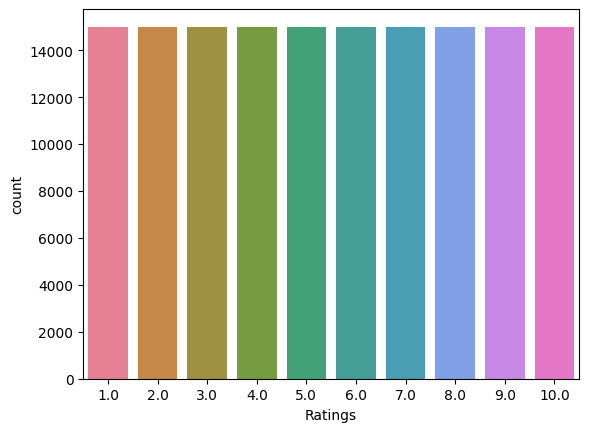

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette("husl", n_colors=len(df['Ratings'].unique()))

sns.countplot(x='Ratings', data=df, hue='Ratings', palette=custom_palette, legend=False)

plt.show()

print(df['Ratings'].value_counts())

### Exploring Positive and Negative Reviews with Word Clouds

In [16]:
%%time
from wordcloud import WordCloud

sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))

CPU times: total: 46.9 ms
Wall time: 396 ms


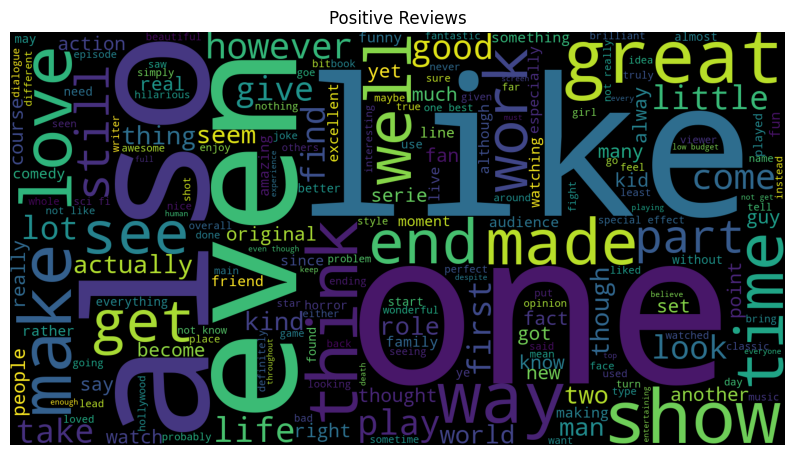

CPU times: total: 14.8 s
Wall time: 33.2 s


In [19]:
%%time

pos_wordcloud = WordCloud(
                width = 1500, 
                height = 800, 
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')
plt.show() 

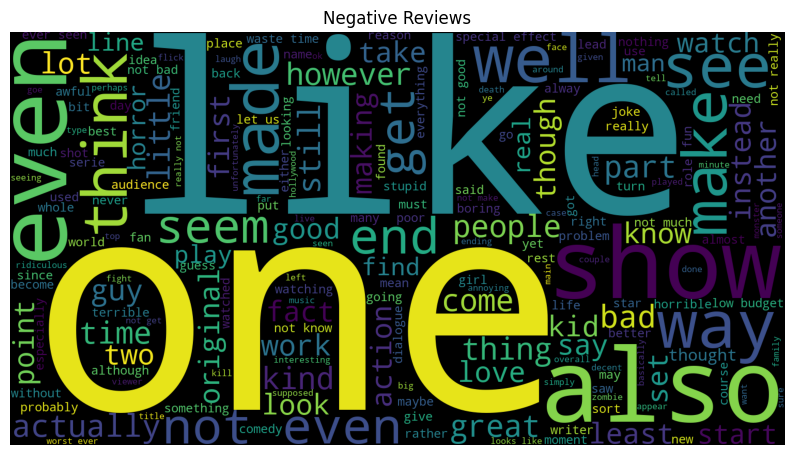

CPU times: total: 10.5 s
Wall time: 28.9 s


In [20]:
%%time

neg_wordcloud = WordCloud(
                width = 1500, 
                height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

### Basic Statistic of Review data

### Review Length Distribution by Sentiment

*This visualization compares the distribution of character counts in positive and negative reviews. The x-axis represents the number of characters, while the y-axis shows the frequency of reviews within each character range.*

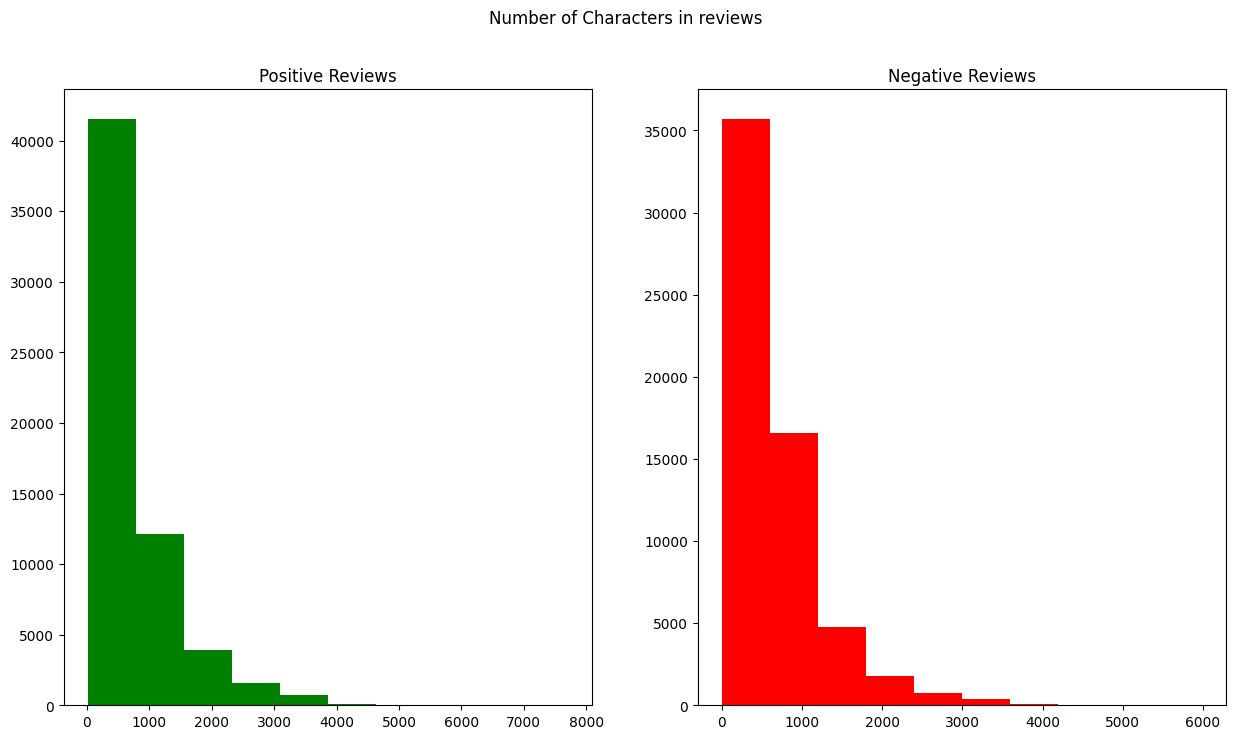

In [28]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))

len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')

len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Number of Characters in reviews')
plt.show()


### Word Count Distribution in Reviews by Sentiment

*This visualization presents a side-by-side comparison of the distribution of word counts in positive and negative reviews. The x-axis represents the number of words in each review, while the y-axis shows the frequency of reviews with that word count. The green histogram illustrates positive reviews, and the red histogram represents negative reviews, providing insights into the verbosity and detail level of reviews based on sentiment.*

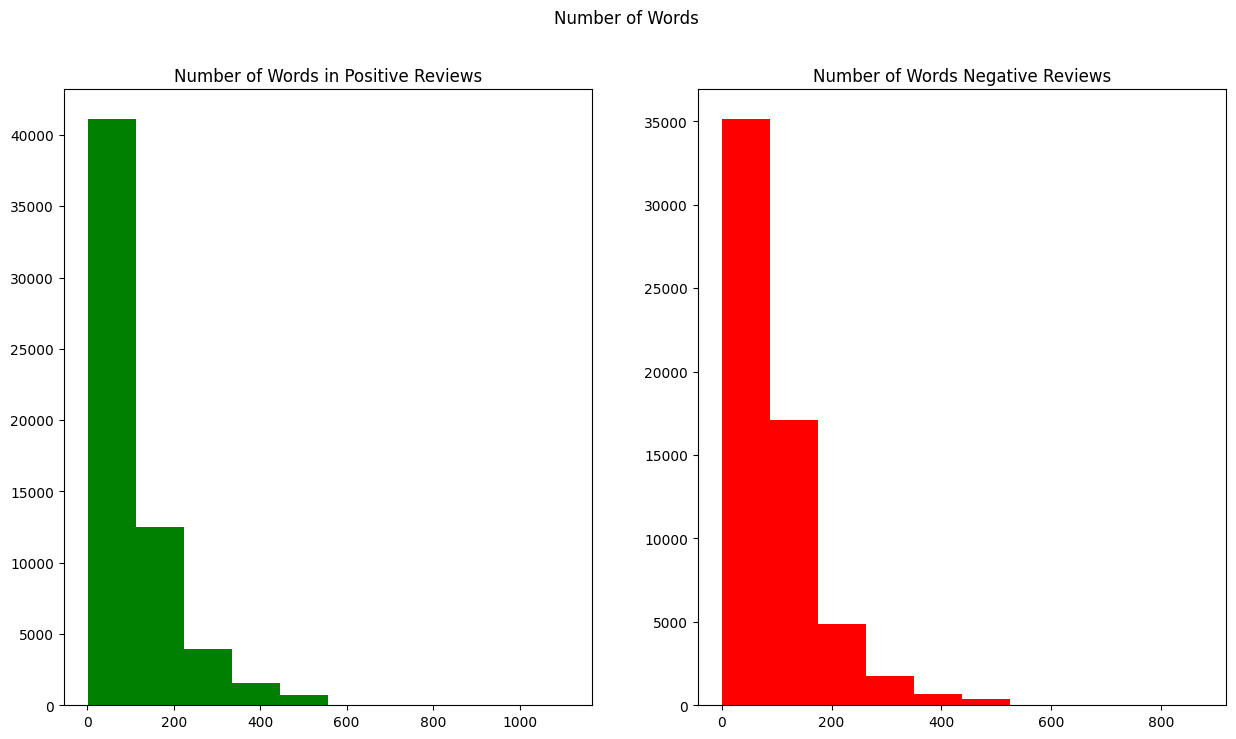

In [29]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))

pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')

neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')

figure.suptitle('Number of Words')
plt.show()